<a href="https://colab.research.google.com/github/FierceAmoeba283/Proiect_PCLP3/blob/main/Proiect_PCLP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Voi implementa o problema de tip regresie

# Pentru aceasta problema de regresie am folosit un set de date de pe platforma Kaggle, referitor la performanta academica a studentilor in functie de obiceiurile lor (academice, dar si din viata de zi cu zi)

* Am instalat kaggle

In [ ]:
!pip install -q kaggle

* Am incarcat API-ul necesar

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vladionudumitrescu","key":"8b46d632c9017fdd6af80961ae8031bf"}'}

* Am creat un fisier local pentru kaggle si i-am acordat permisiuni

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

* Am descarcat baza de date

In [ ]:
!kaggle datasets download -d jayaantanaath/student-habits-vs-academic-performance
!unzip student-habits-vs-academic-performance.zip -d data

Dataset URL: https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance
License(s): apache-2.0
  0% 0.00/19.1k [00:00<?, ?B/s]
100% 19.1k/19.1k [00:00<00:00, 59.9MB/s]
Archive:  student-habits-vs-academic-performance.zip
  inflating: data/student_habits_performance.csv  


In [ ]:
import pandas as pd
df = pd.read_csv("./data/student_habits_performance.csv")
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


## Exploratory data analysis (EDA)

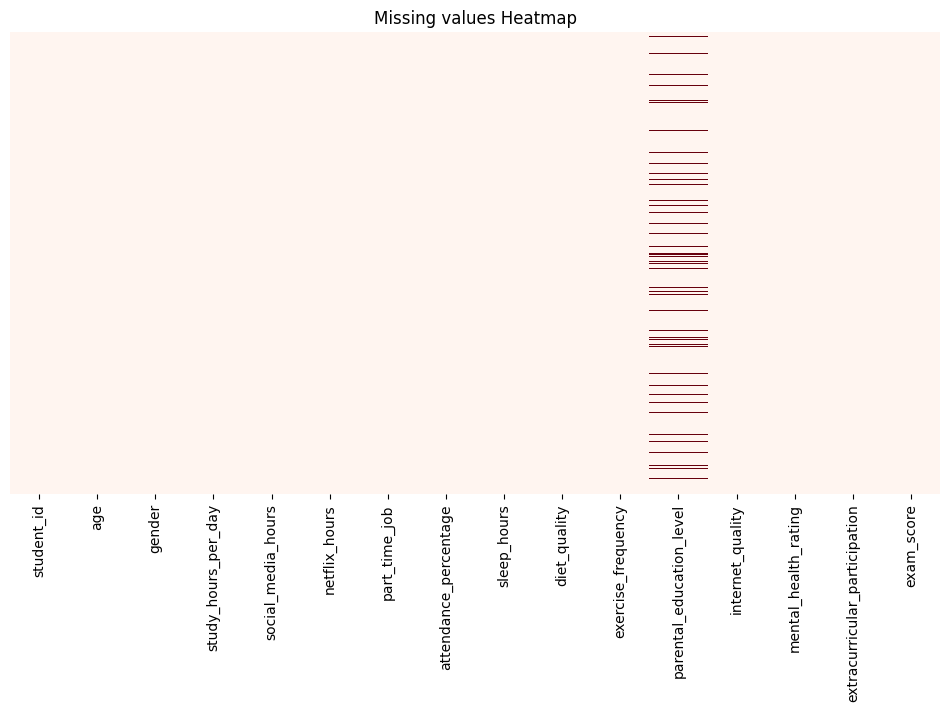

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#analiza detaliata a valorilor lipsa
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds", yticklabels=False)
plt.title("Missing values Heatmap")
plt.show()

* De aici pot deduce ca se gasesc date lipsa in coloana "parental_education_level", trebuind ca ulterior sa elimin liniile unde se gasesc acestea

# Elimin liniile in care se gasesc date lipsa

In [ ]:
df = df.dropna()
print("Missing values:\n", df.isnull().sum())

Missing values:
 student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


# Distributia notelor

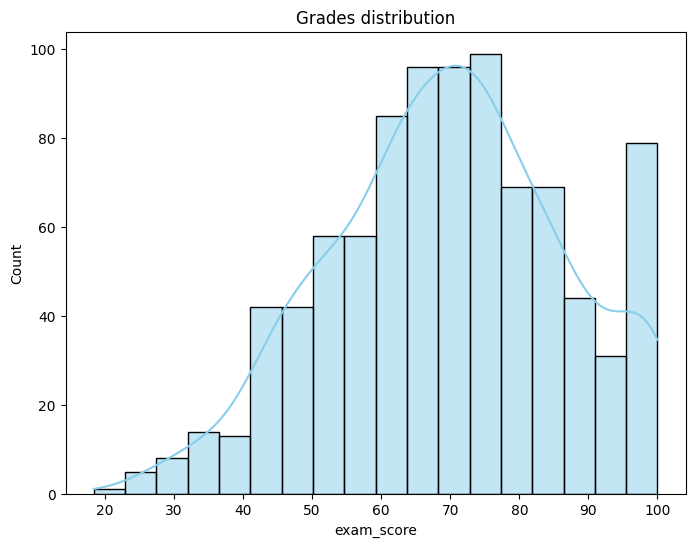

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['exam_score'], kde=True, color= 'skyblue')
plt.title("Grades distribution")
plt.show()

# Acum pot incepe antrenarea propriu-zisa a modelului

# Verific care coloane sunt numerice si care sunt categorice

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['student_id', 'gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']


# Analiza valorilor categorice

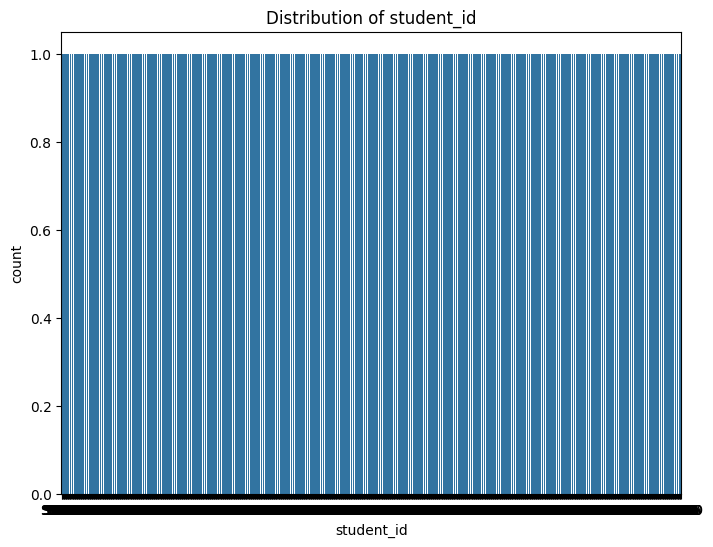

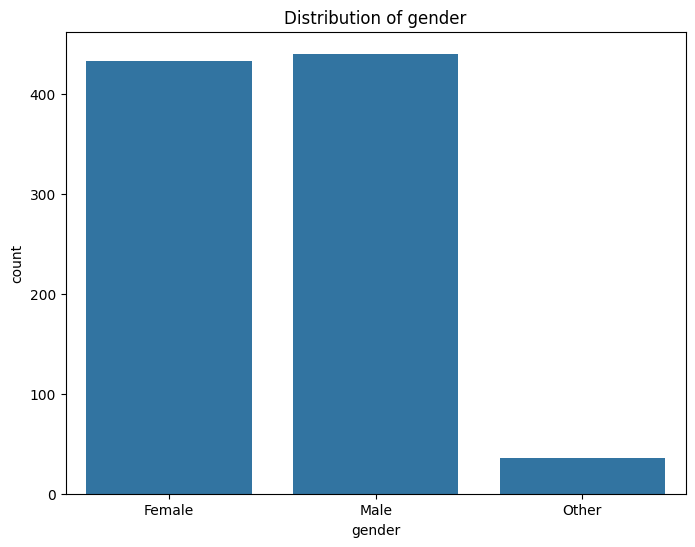

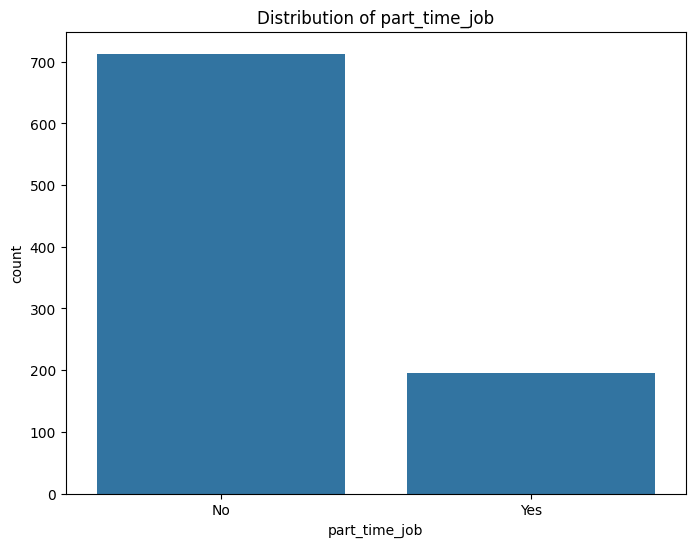

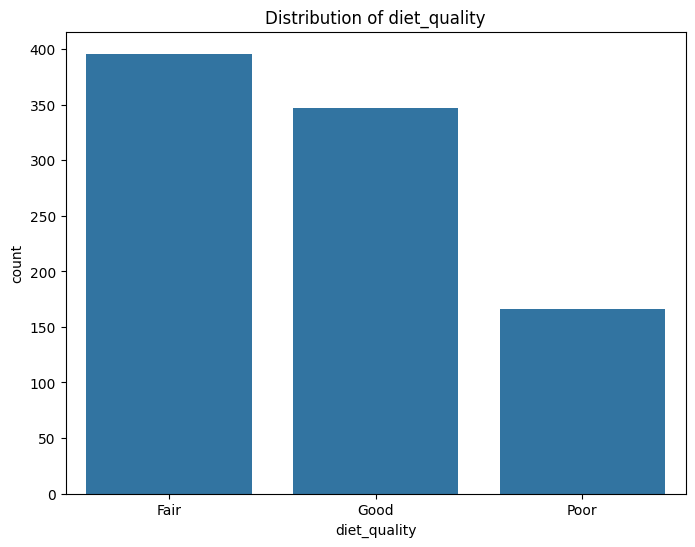

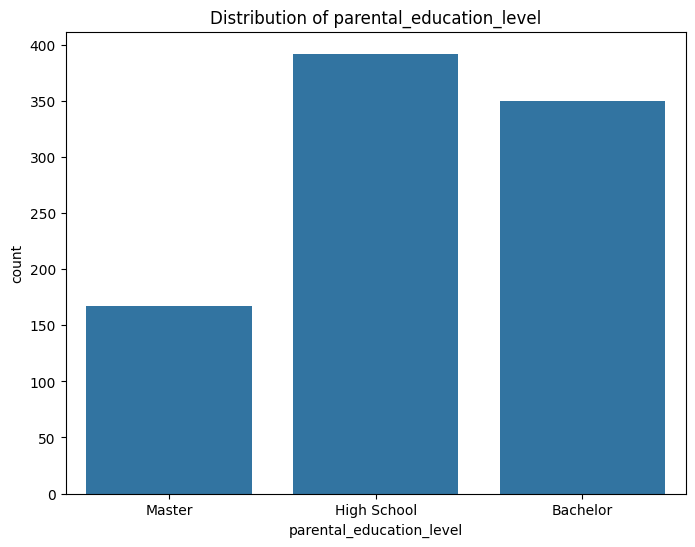

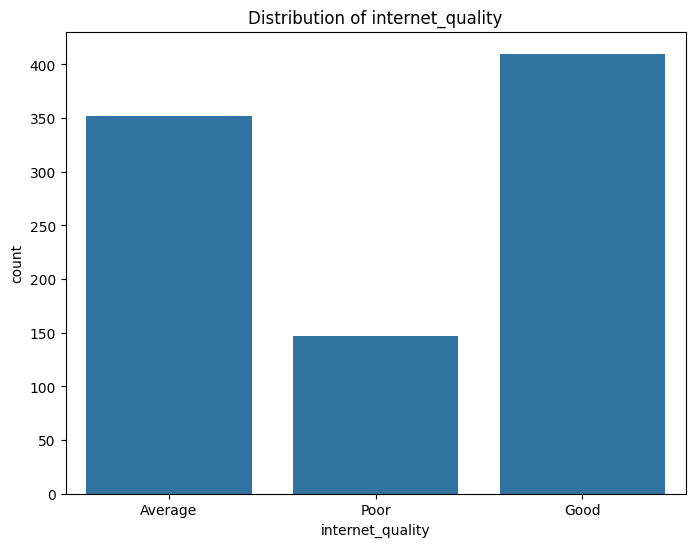

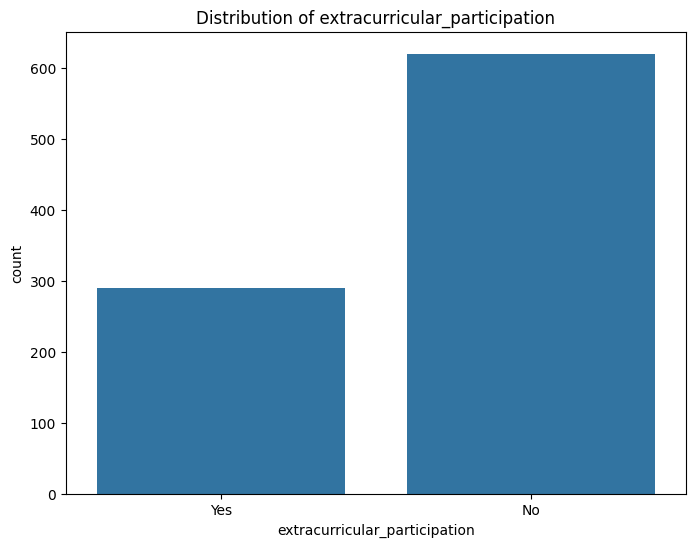

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()

* In aceste garfice putem observa distributia datelor numerice din cadrul setului de date.

# Analiza valorilor numerice

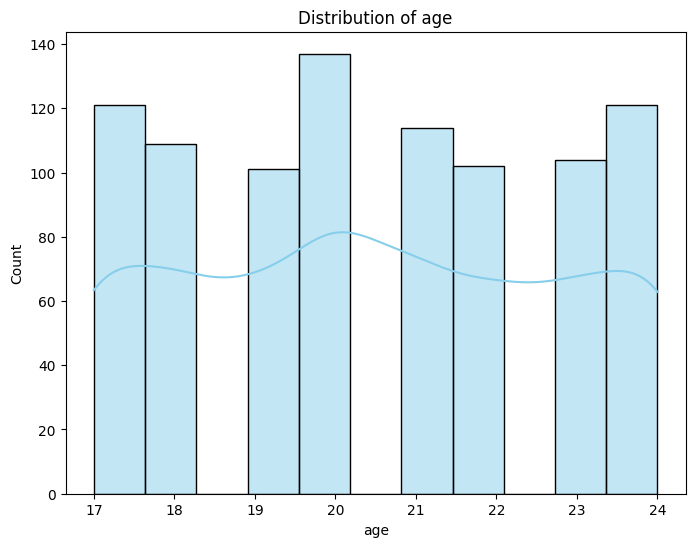

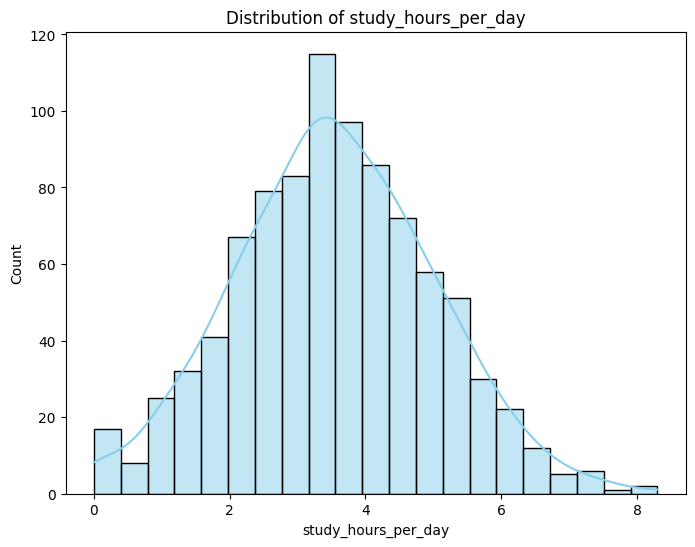

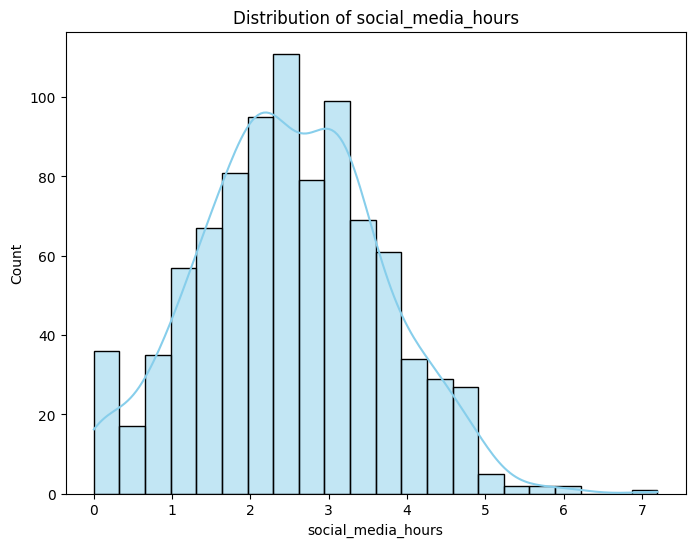

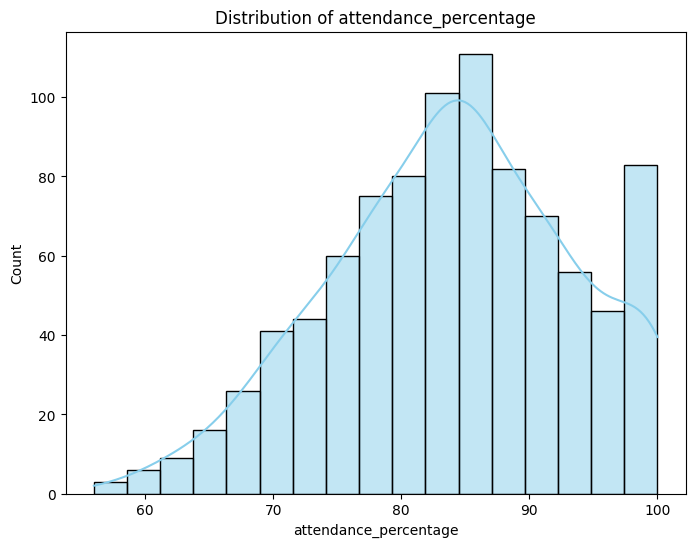

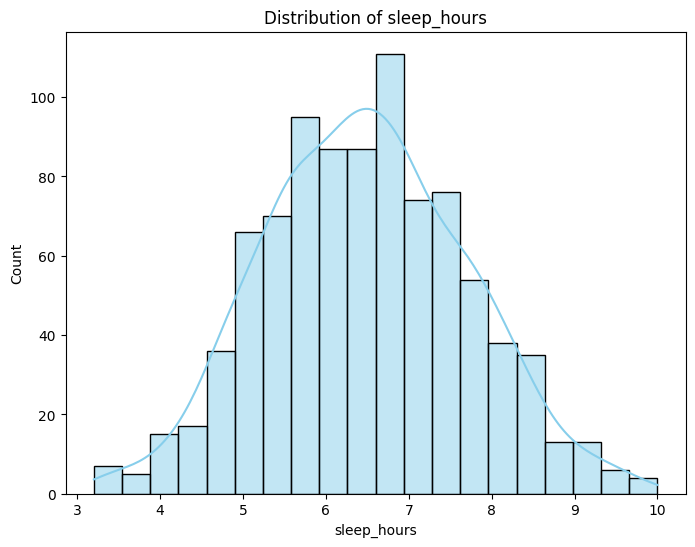

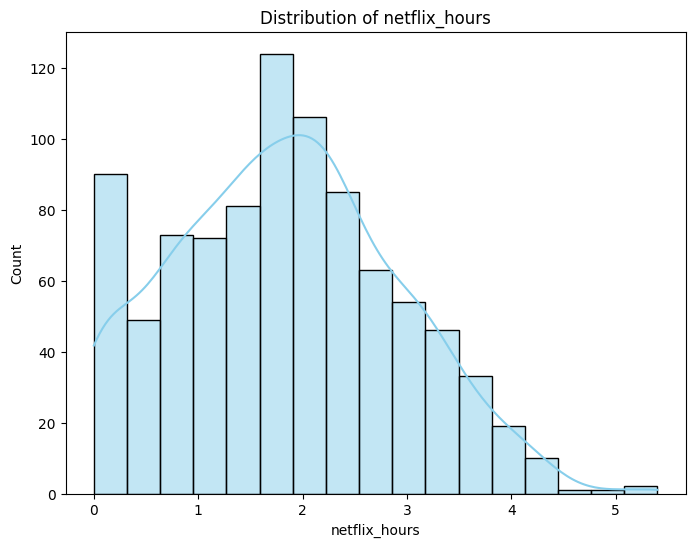

In [ ]:
numerical_cols = ['age', 'study_hours_per_day', 'social_media_hours', 'attendance_percentage', 'sleep_hours', 'netflix_hours']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color= 'skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()

# Detectarea outlierelor (valorile aberante)

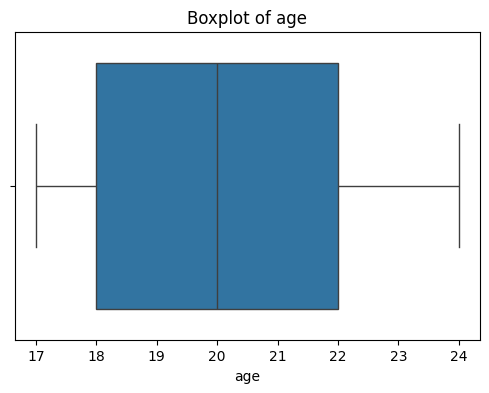

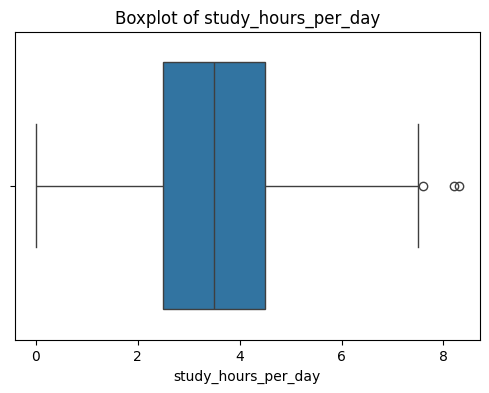

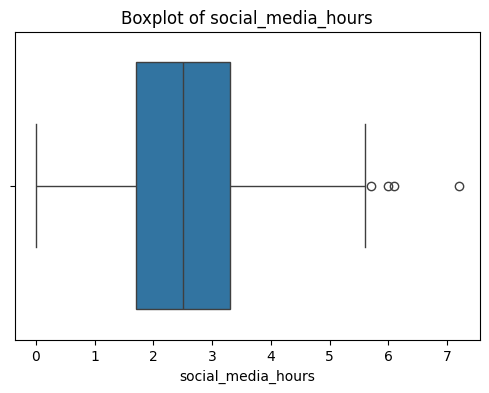

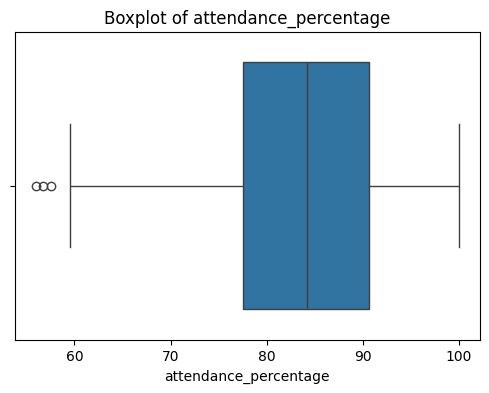

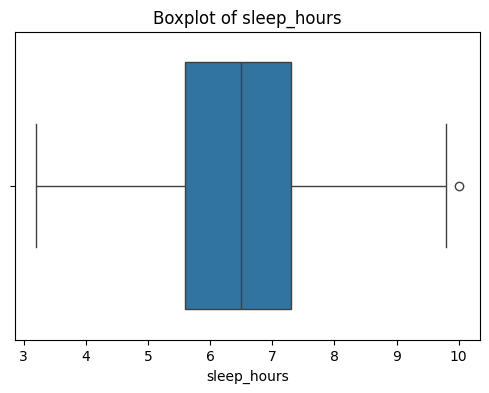

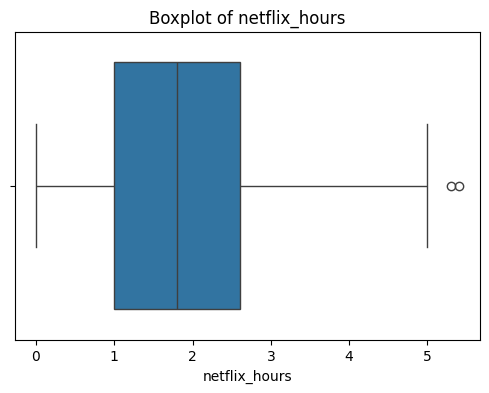

In [ ]:
for col in numerical_cols:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

# Matricea de corelatie

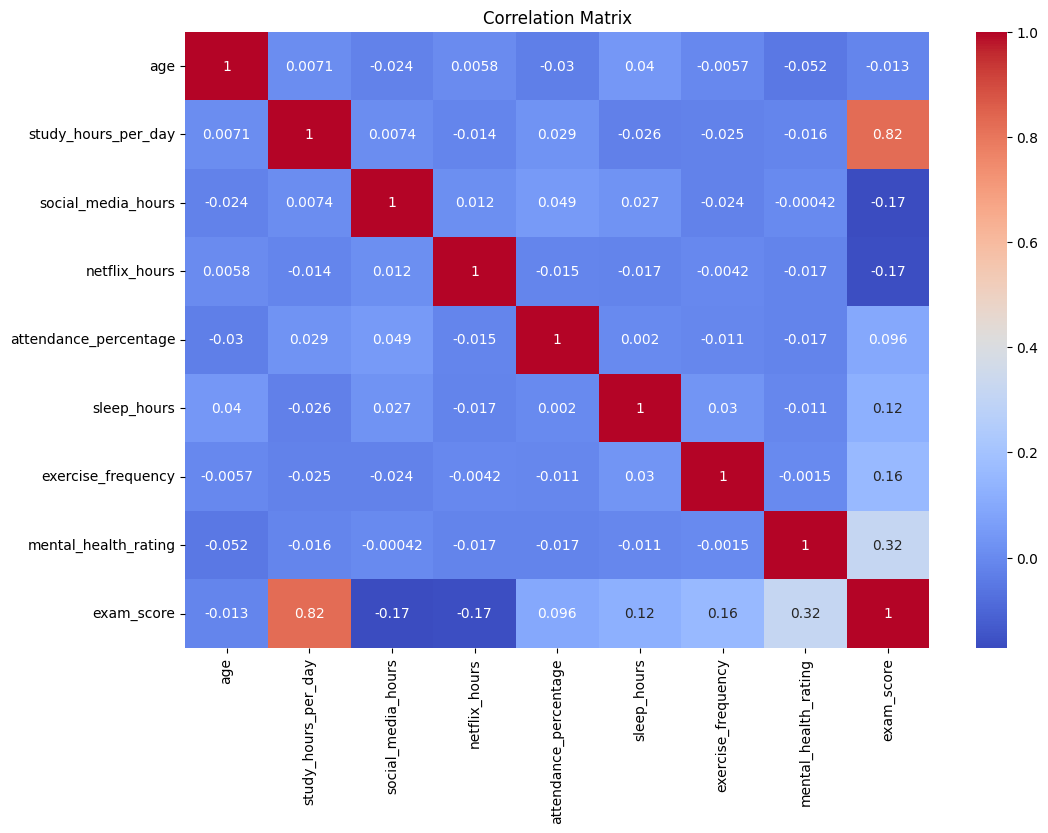

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

* De aici putem trage concluzia ca factorii cei mai importanti pentru determinarea notei la examen sunt orele de invatat, dar si sanatatea mentala, avand a doua cea mai mare pondere asupra performantei academice.

# Relatia fiecarei informatii numerice cu rezultatul obtinut la examen

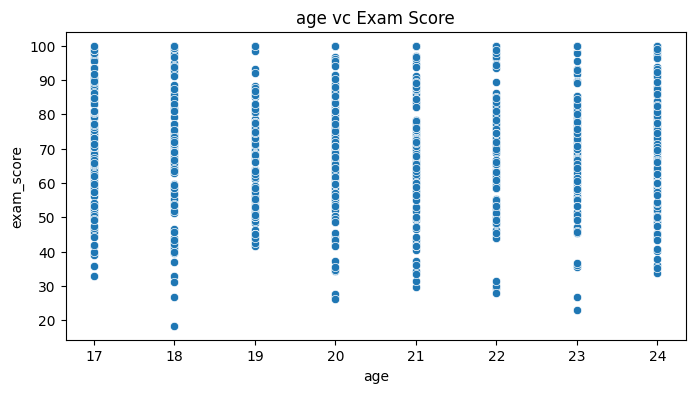

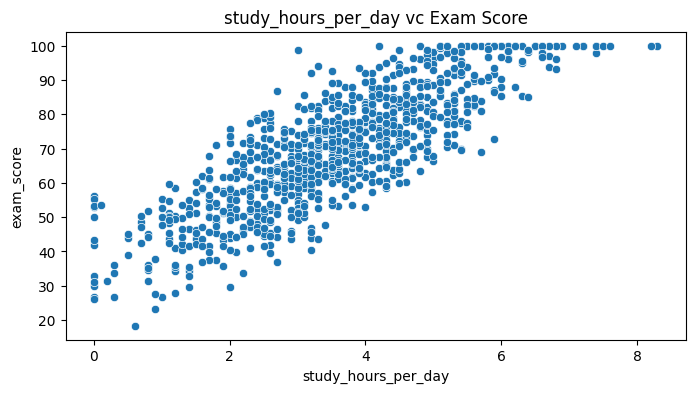

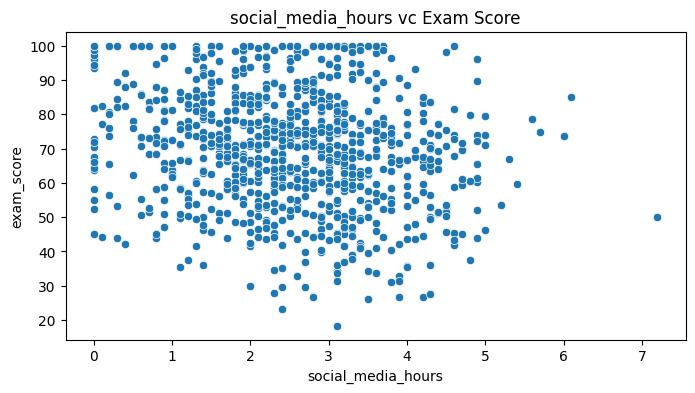

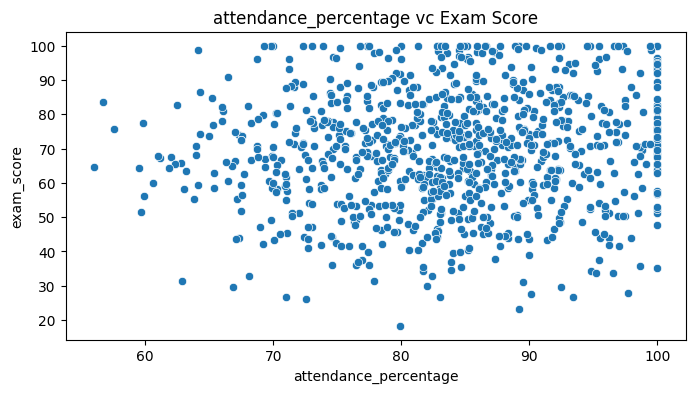

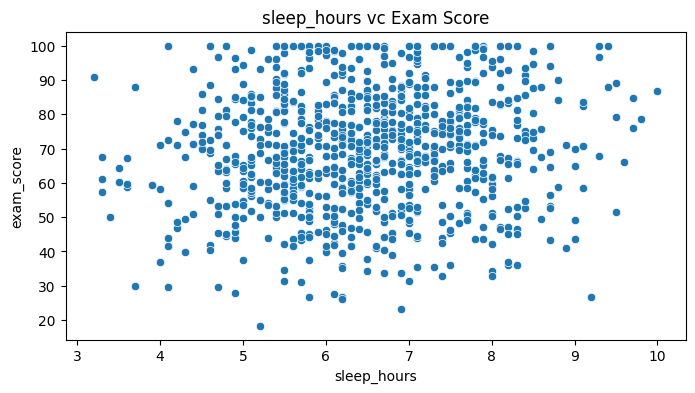

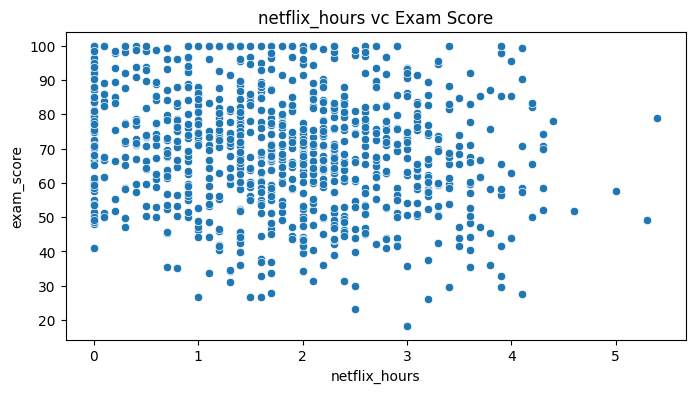

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=col, y='exam_score', data=df)
    plt.title(f"{col} vc Exam Score")
    plt.show()

* Din aceste grafice nu putem trage o concluzie diferita fata de cea obtinuta cu ajutorul matricei de corelatie, anumite rezultate la examen neputand fi atribuite cu acuratete unui anumit obicei sau activitate (de exemplu, notele persoanelor care petrec putin timp pe retele sociale pot fi asemanatoare cu ale celor care petrec mai mult timp, discrepanta aceasta fiind doar datorita numarului mai redus de studenti care folosesc retelele sociale atat de multe ore in cadrul unei singure zile)

# One-hot encode

* Transform valorile categorice in valori numerice pentru ca modelul de regresie sa poata sa functioneze cu acest set de date.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = [col for col in df.select_dtypes(include=['object', 'category']).columns.tolist() if col != 'student_id']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
# elimin coloanele "categorice" si concatenez pe cele numerice
df_final = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)
df_final.head()

,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,gender_Male,gender_Other,part_time_job_Yes,diet_quality_Good,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,internet_quality_Good,internet_quality_Poor,extracurricular_participation_Yes
0,S1000,23.0,0.0,1.2,1.1,85.0,8.0,6.0,8.0,56.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,S1001,20.0,6.9,2.8,2.3,97.3,4.6,6.0,8.0,100.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,S1002,21.0,1.4,3.1,1.3,94.8,8.0,1.0,1.0,34.3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,S1003,23.0,1.0,3.9,1.0,71.0,9.2,4.0,1.0,26.8,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
4,S1004,19.0,5.0,4.4,0.5,90.9,4.9,3.0,1.0,66.4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


# Verific daca exista valori lipsa in df_final

In [ ]:
print("Missing values:\n", df_final.isnull().sum())

Missing values:
 student_id                              83
age                                     83
study_hours_per_day                     83
social_media_hours                      83
netflix_hours                           83
attendance_percentage                   83
sleep_hours                             83
exercise_frequency                      83
mental_health_rating                    83
exam_score                              83
gender_Male                             83
gender_Other                            83
part_time_job_Yes                       83
diet_quality_Good                       83
diet_quality_Poor                       83
parental_education_level_High School    83
parental_education_level_Master         83
internet_quality_Good                   83
internet_quality_Poor                   83
extracurricular_participation_Yes       83
dtype: int64


# Elimin valorile lipsa din df_final

* Modelul de regresie liniara nu poate lucra nativ cu numere lipsa. Am ales sa elimin datele unde se gasesc valori lipsa intrucat numarul acestor valori lipsa este unul redus din total.

In [ ]:
df_final = df_final.dropna()
print("Missing values:\n", df_final.isnull().sum())

Missing values:
 student_id                              0
age                                     0
study_hours_per_day                     0
social_media_hours                      0
netflix_hours                           0
attendance_percentage                   0
sleep_hours                             0
exercise_frequency                      0
mental_health_rating                    0
exam_score                              0
gender_Male                             0
gender_Other                            0
part_time_job_Yes                       0
diet_quality_Good                       0
diet_quality_Poor                       0
parental_education_level_High School    0
parental_education_level_Master         0
internet_quality_Good                   0
internet_quality_Poor                   0
extracurricular_participation_Yes       0
dtype: int64


# Impart setul de date in features si target

In [ ]:
X = df_final.drop("exam_score", axis=1)
y = df_final["exam_score"]

# Impart setul de date pentru antrenament si pentru test

Am ales test_size de 200 pentru a respecta cerintele proiectului, in care dimensiunea subsetului de testare este de minim 200 de randuri

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (626, 19)
X_test shape: (200, 19)
y_train shape: (626,)
y_test shape: (200,)


# Creez test.csv si train.csv

In [ ]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

Train data shape: (626, 20)
Test data shape: (200, 20)


# Scalez valorile numerice ptr regresie (ajuta la acuratetea modelului)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop('student_id', axis=1))
X_test_scaled = scaler.transform(X_test.drop('student_id', axis=1))

# Alegerea si antrenarea unui model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

Mean squared error: 26.85537996894451
R2 score: 0.9148148395844035


 *   Scorul R2 indica apropierea de adevar a predictiilor modelului. Faptul ca
scorul este de peste 0.9 indica o mare acuratete a predictiilor realizate de catre model.

*   "Mean squared error" de 26 (obtinut in cadrul rularii mele) corespunde unei erori de aproximativ de 5.1 puncte din totalul de 100, ceea ce sustine scorul r2, demonstrand acuratetea modelului de regresie.

# Interpretarea predictiilor

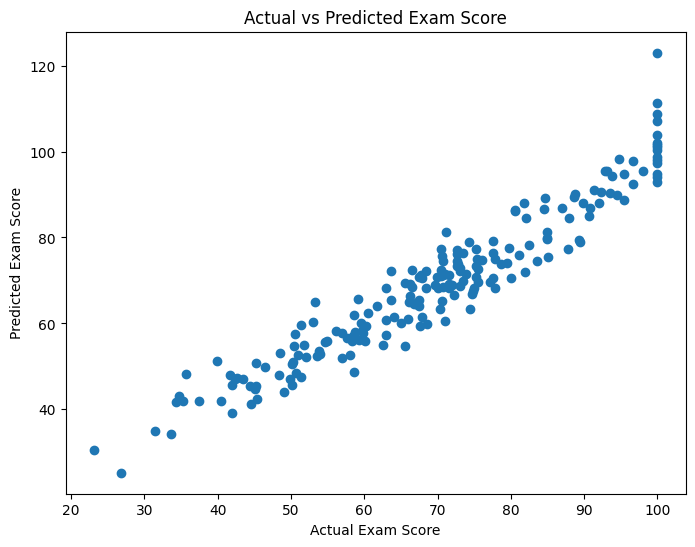

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Score")
plt.show()

* Apropierea punctelor de diagonala indica o acuratete ridicata a modelului, notele prezise fiind aproape de valorile originale in majoritatea cazurilor, insa exista exceptii. Se pot observa cateva rezultate aberante, modelul prezicand note mai mari de 100 de puncte, ceea ce nu este posibil, insa cazurile acestea sunt rare.